# Q-learning for solving a simple maze

## Program of Q-learning


<<Initial Q>>
[[       nan 0.90342291 0.82436793        nan]
 [       nan 0.96732876        nan 0.25031279]
 [       nan        nan 0.4952613  0.29623896]
 [0.77598452 0.11175478 0.59344121        nan]
 [       nan        nan 0.42633434 0.79958212]
 [0.81389592        nan        nan        nan]
 [0.807673          nan        nan        nan]
 [0.59780343 0.16757669        nan        nan]]

<<Final Q>>
[[       nan 0.34886886 0.34936149        nan]
 [       nan 0.35014893        nan 0.34726324]
 [       nan        nan 0.34971729 0.34754114]
 [0.36913214 0.39438779 0.36667247        nan]
 [       nan        nan 0.53026451 0.38143335]
 [0.348664          nan        nan        nan]
 [0.36623433        nan        nan        nan]
 [0.39258519 0.80956825        nan        nan]]

The number of steps of the first episode: 298
The number of steps of the last episode: 4


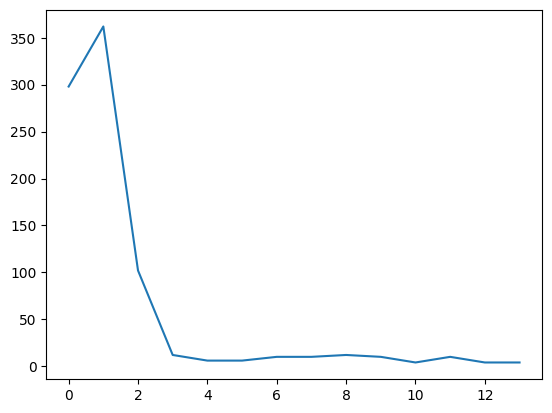

In [1]:
# coding: utf-8

###################################################################
# Q-learning for solving a maze.
# References:
#   小川：作りながら学ぶ深層強化学習，マイナビ出版 (2018).
#   https://github.com/YutaroOgawa/Deep-Reinforcement-Learning-Book
###################################################################

# Pckages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# This function transforms the policy parameter theta to a policy pi
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape  # Obtains the matrix size of theta.
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi)  # Converts nan to 0.
    return pi


# This function chooses an action with the epsilon-greedy method.
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])  # Chooses an action randomly.
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]  # Selects the actoin whose Q is the leargest.
    # 行動をindexに
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    return action


# This function returns the next state.
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]
    if next_direction == "up":
        s_next = s - 3  # If the agent moves up, the state number decreases by 3.
    elif next_direction == "right":
        s_next = s + 1  # If the agent moves right, the state number increases by 1.
    elif next_direction == "down":
        s_next = s + 3  # If the agent moves down, the state number increases by 3.
    elif next_direction == "left":
        s_next = s - 1  # if the agent moves left, the state number decreases by 1.
    return s_next


# This function makes the agent run until the agent reaches the goal and returns the history of states and actions and Q.
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # The initial state
    a = a_next = get_action(s, Q, epsilon, pi)  # An initial action
    s_a_history = [[0, np.nan]]  # The history in which states and actions are recorded.
    while 1:  # Repeates until the agent reaches the goal.
        a = a_next  # The current action
        s_a_history[-1][1] = a  # Assigns the action of the current state.
        s_next = get_s_next(s, a, Q, epsilon, pi)  # The next state
        s_a_history.append([s_next, np.nan])  # Assign the next state. Let the action nan because it is unknown.
        if s_next == 8:  # The case where the agent reaches the goal.
            r = 1  # The reward
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)  # Chosses the next action.
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)  # Updates Q.
        if s_next == 8:  # if the agent reaches the goal, terminate the loop.
            break
        else:
            s = s_next
    return [s_a_history, Q]


# This function updates Q by Q-Learning
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 8:  # The case where the agent reaches the goal.
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    return Q


# Main
eta = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.5  # Initial epsilon
max_episode = 14
# The initial policy parameter, theta_0.
# The row represetns state numbers:  0-7. The column represents actions: up, right, down and left.
theta_0 = np.array(
    [
        [np.nan, 1, 1, np.nan],  # s0
        [np.nan, 1, np.nan, 1],  # s1
        [np.nan, np.nan, 1, 1],  # s2
        [1, 1, 1, np.nan],  # s3
        [np.nan, np.nan, 1, 1],  # s4
        [1, np.nan, np.nan, np.nan],  # s5
        [1, np.nan, np.nan, np.nan],  # s6
        [1, 1, np.nan, np.nan],  # s7
    ]
)
pi_0 = simple_convert_into_pi_from_theta(theta_0)  # Obtains a random policy, pi_0.
[a, b] = theta_0.shape  # Obtains the matrix size of theta_0.
Q_0 = np.random.rand(a, b) * theta_0  # Makes the Q-values corresponding to the wall nan.
Q = Q_0.copy()
episode = 1
steps = []
while True:
    epsilon = epsilon / 2  # Decreases epsilon gradually.
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    steps.append(len(s_a_history) - 1)
    episode = episode + 1
    if episode > max_episode:
        break
print("\n<<Initial Q>>")
print(Q_0)
print("\n<<Final Q>>")
print(Q)

# plot steps
plt.plot(steps)
print(f"\nThe number of steps of the first episode: {steps[0]}")
print(f"The number of steps of the last episode: {steps[len(steps) - 1]}")

## Program for animation

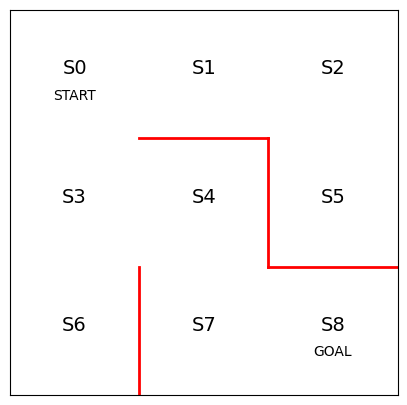

In [2]:
# This program visualizes how the agent moved in the maze.
# Reference: http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

import matplotlib.pyplot as plt

get_ipython().run_line_magic("matplotlib", "inline")
from matplotlib import animation
from IPython.display import HTML


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data([x], [y])  # Pass x and y as lists
    return (line,)


# Main
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
plt.plot([1, 1], [0, 1], color="red", linewidth=2)
plt.plot([1, 2], [2, 2], color="red", linewidth=2)
plt.plot([2, 2], [2, 1], color="red", linewidth=2)
plt.plot([2, 3], [1, 1], color="red", linewidth=2)
plt.text(0.5, 2.5, "S0", size=14, ha="center")
plt.text(1.5, 2.5, "S1", size=14, ha="center")
plt.text(2.5, 2.5, "S2", size=14, ha="center")
plt.text(0.5, 1.5, "S3", size=14, ha="center")
plt.text(1.5, 1.5, "S4", size=14, ha="center")
plt.text(2.5, 1.5, "S5", size=14, ha="center")
plt.text(0.5, 0.5, "S6", size=14, ha="center")
plt.text(1.5, 0.5, "S7", size=14, ha="center")
plt.text(2.5, 0.5, "S8", size=14, ha="center")
plt.text(0.5, 2.3, "START", ha="center")
plt.text(2.5, 0.3, "GOAL", ha="center")
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(
    axis="both", which="both", bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False
)
(line,) = ax.plot([0.5], [2.5], marker="o", color="g", markersize=60)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())